# Define packages

In [1]:
import os
import random
import os.path as osp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

# from keras.layers import Dense, Flatten, Embedding, Multiply, Concatenate, Input
# from keras.layers.advanced_activations import LeakyReLU
# from keras.models import Model, Sequential

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, balanced_accuracy_score, roc_curve, auc
def fix_all_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
fix_all_seeds(2021)

# Load data from Google drive or download from GitHub


In [2]:
from google.colab import drive
drive.mount('/content/drive')
BASE_DIR = "/content/drive/MyDrive/DSM-AS/input"
OUTPUT_DIR = "/content/drive/MyDrive/DSM-AS/output"
data_df = pd.read_csv(osp.join(BASE_DIR, "data.csv"))
if not osp.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Define hyperparameters

In [3]:
Y_FEATURE = 'diagnosis'
X_FEATURES = ['radius_mean', 'texture_mean', 'perimeter_mean',
              'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
              'concave points_mean', 'concavity_mean', 'fractal_dimension_mean',
              'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
              'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
              'fractal_dimension_se', 'radius_worst', 'texture_worst',
              'perimeter_worst', 'area_worst', 'smoothness_worst',
              'compactness_worst', 'concavity_worst', 'concave points_worst',
              'symmetry_worst', 'fractal_dimension_worst']
DISTRIBUTION_MODES = ["setting1", "setting2", "setting3"]
STATION_LIST = ["uka", "umg", "ukk", "ukl", "imise", "hsm"]

# Define Models

In [4]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(LogisticRegression, self).__init__()
        self.hidden_layer = nn.Linear(input_dim, hidden_dim)
        self.sigmoid = nn.Sigmoid()
        self.output_layer = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        out = self.output_layer(self.sigmoid(self.hidden_layer(x)))
        return out

# Define training and validation functions

In [5]:
def train(X_train, y_train, model, criterion, optimizer):
    inputs = torch.from_numpy(X_train).float()
    targets = torch.from_numpy(y_train).long()
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    return loss.item()

def valid(X_test, y_test, model, criterion):
    inputs = torch.from_numpy(X_test).float()
    targets = torch.from_numpy(y_test).long()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    _, predicted = torch.max(outputs, 1)
    cm = confusion_matrix(targets.numpy(), predicted.numpy())
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    # acc = accuracy_score(targets.numpy(), predicted.numpy())
    # bacc = balanced_accuracy_score(targets.numpy(), predicted.numpy())
    # prec = precision_score(targets.numpy(), predicted.numpy())
    # rec = recall_score(targets.numpy(), predicted.numpy())
    # f1 = f1_score(targets.numpy(), predicted.numpy())
    # mc = matthews_corrcoef(targets.numpy(), predicted.numpy())
    with np.errstate(divide='ignore', invalid='ignore'):
        acc = (tp + tn) / (tp + fp + fn + tn)
        bacc = (tp/(tp + fn) + tn/(fp + tn))/2
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        f1 = 2 * tp / (2 * tp + fn + fp)
        mc = ((tp * tn) - (fp * fn)) / np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
    return loss.item(), tn, fp, fn, tp, acc, bacc, prec, rec, f1, mc

# Starting Experiments: Single Site Train, Instituional Incremental Learning and Cyclic Instituional Incremental Learning

##################################################################################
Data Distribution Mode: setting1
##################################################################################
* Start Single Site Training
**On UKA
loss 0.2160, acc 92.98, bacc 90.94, precision 98.15, recall 82.81, f1 89.83, matthews_corrcoef 85.24, 
**On UMG
loss 0.3257, acc 84.80, bacc 86.59, precision 73.17, recall 93.75, f1 82.19, matthews_corrcoef 70.90, 
**On UKK
loss 0.2137, acc 89.47, bacc 87.82, precision 89.66, recall 81.25, f1 85.25, matthews_corrcoef 77.32, 
**On UKL
loss 0.2628, acc 92.98, bacc 93.14, precision 88.24, recall 93.75, f1 90.91, matthews_corrcoef 85.31, 
**On IMISE
loss 0.2519, acc 93.57, bacc 92.66, precision 93.44, recall 89.06, f1 91.20, matthews_corrcoef 86.20, 
**On HSM
loss 0.2406, acc 90.64, bacc 91.27, precision 83.33, recall 93.75, f1 88.24, matthews_corrcoef 80.90, 


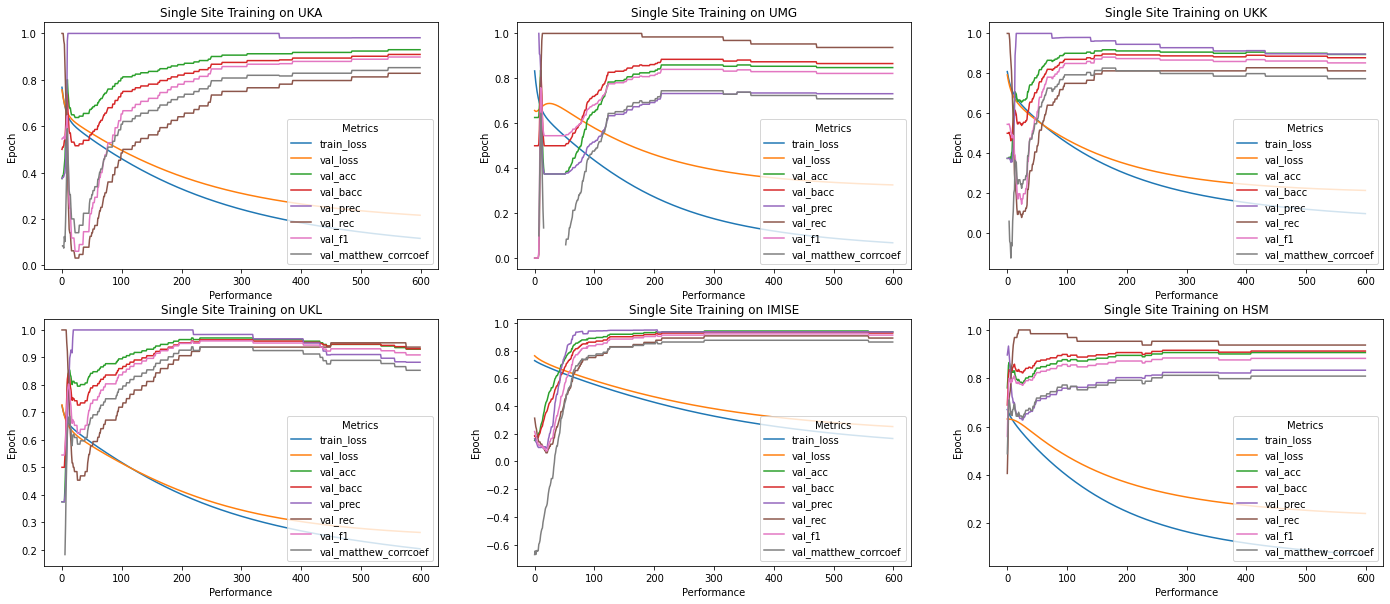

* Start Institutional Incremental Learning
* Start Institutional Incremental Learning
loss 0.2335, acc 94.15, bacc 94.70, precision 88.57, recall 96.88, f1 92.54, matthews_corrcoef 87.98, 
* Start Cyclic Institutional Incremental Learning
loss 0.2244, acc 94.74, bacc 95.17, precision 89.86, recall 96.88, f1 93.23, matthews_corrcoef 89.11, 


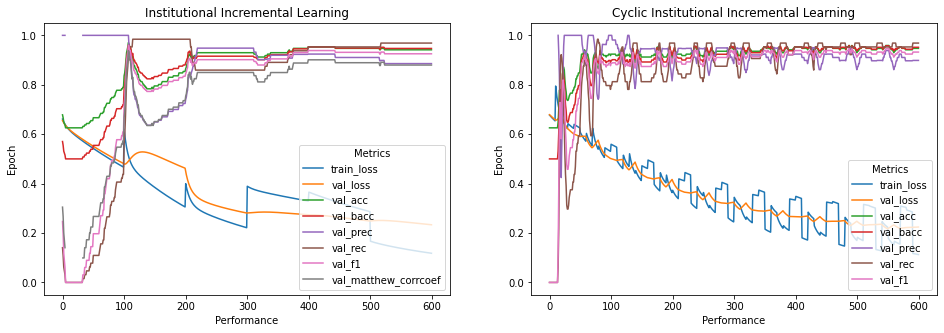

##################################################################################
Data Distribution Mode: setting2
##################################################################################
* Start Single Site Training
**On UKA
loss 0.2200, acc 90.64, bacc 89.38, precision 90.00, recall 84.38, f1 87.10, matthews_corrcoef 79.87, 
**On UMG
loss 0.2489, acc 88.89, bacc 88.92, precision 82.61, recall 89.06, f1 85.71, matthews_corrcoef 76.79, 
**On UKK
loss 0.2724, acc 90.64, bacc 91.58, precision 82.43, recall 95.31, f1 88.41, matthews_corrcoef 81.23, 
**On UKL
loss 0.2129, acc 92.98, bacc 92.19, precision 91.94, recall 89.06, f1 90.48, matthews_corrcoef 84.95, 
**On IMISE
loss 0.1960, acc 91.81, bacc 90.32, precision 93.10, recall 84.38, f1 88.52, matthews_corrcoef 82.43, 
**On HSM
loss 0.3373, acc 85.38, bacc 87.69, precision 72.94, recall 96.88, f1 83.22, matthews_corrcoef 72.96, 


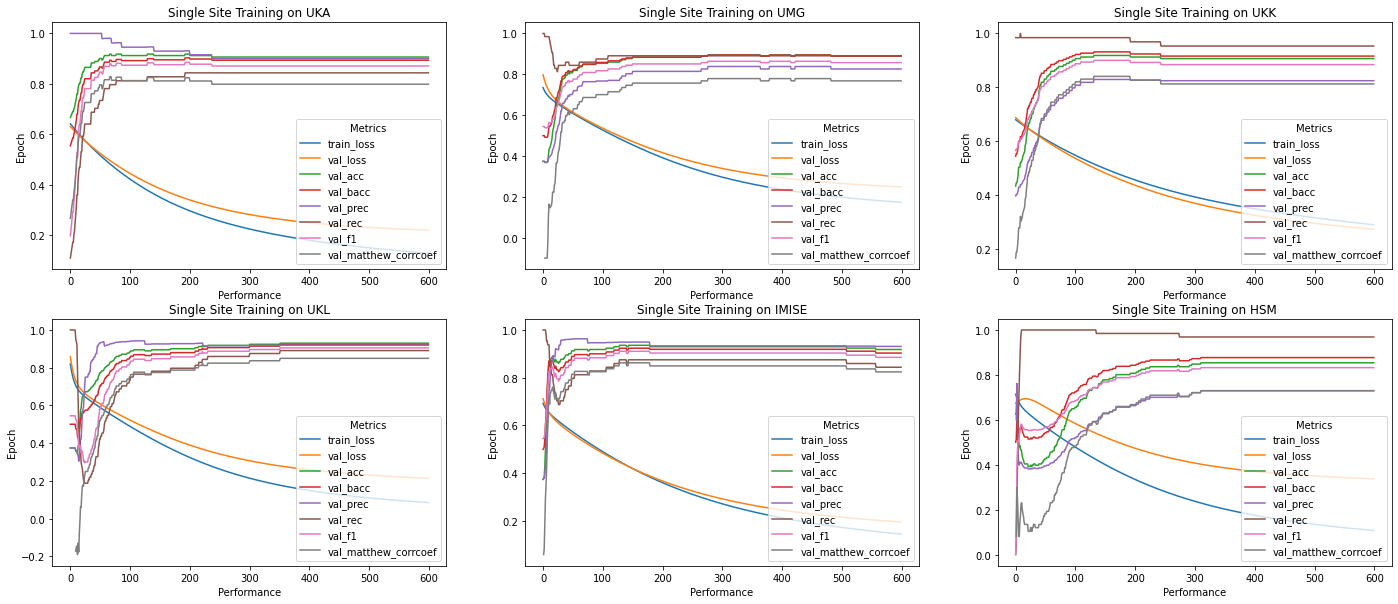

* Start Institutional Incremental Learning
* Start Institutional Incremental Learning
loss 0.2900, acc 89.47, bacc 91.27, precision 78.75, recall 98.44, f1 87.50, matthews_corrcoef 80.06, 
* Start Cyclic Institutional Incremental Learning
loss 0.2396, acc 92.40, bacc 93.30, precision 84.93, recall 96.88, f1 90.51, matthews_corrcoef 84.72, 


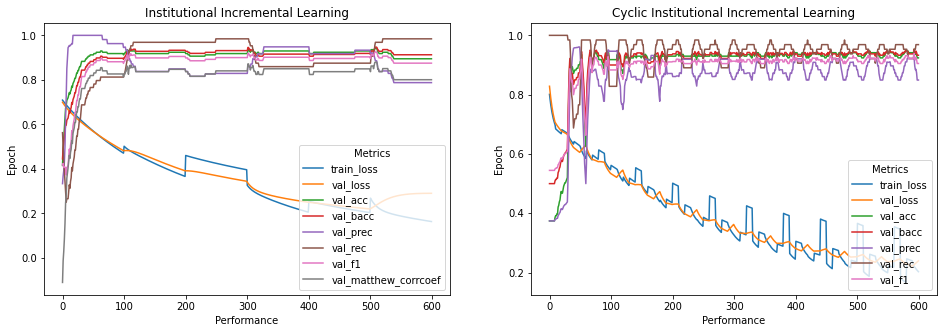

##################################################################################
Data Distribution Mode: setting3
##################################################################################
* Start Single Site Training
**On UKA
loss 0.2394, acc 92.40, bacc 92.04, precision 89.23, recall 90.62, f1 89.92, matthews_corrcoef 83.83, 
**On UMG
loss 0.2559, acc 91.81, bacc 90.63, precision 91.67, recall 85.94, f1 88.71, matthews_corrcoef 82.40, 
**On UKK
loss 0.2294, acc 97.08, bacc 97.04, precision 95.38, recall 96.88, f1 96.12, matthews_corrcoef 93.78, 
**On UKL
loss 0.1974, acc 92.98, bacc 91.88, precision 93.33, recall 87.50, f1 90.32, matthews_corrcoef 84.94, 
**On IMISE
loss 0.2662, acc 90.06, bacc 91.43, precision 80.52, recall 96.88, f1 87.94, matthews_corrcoef 80.59, 
**On HSM
loss 0.2897, acc 89.47, bacc 90.96, precision 79.49, recall 96.88, f1 87.32, matthews_corrcoef 79.60, 


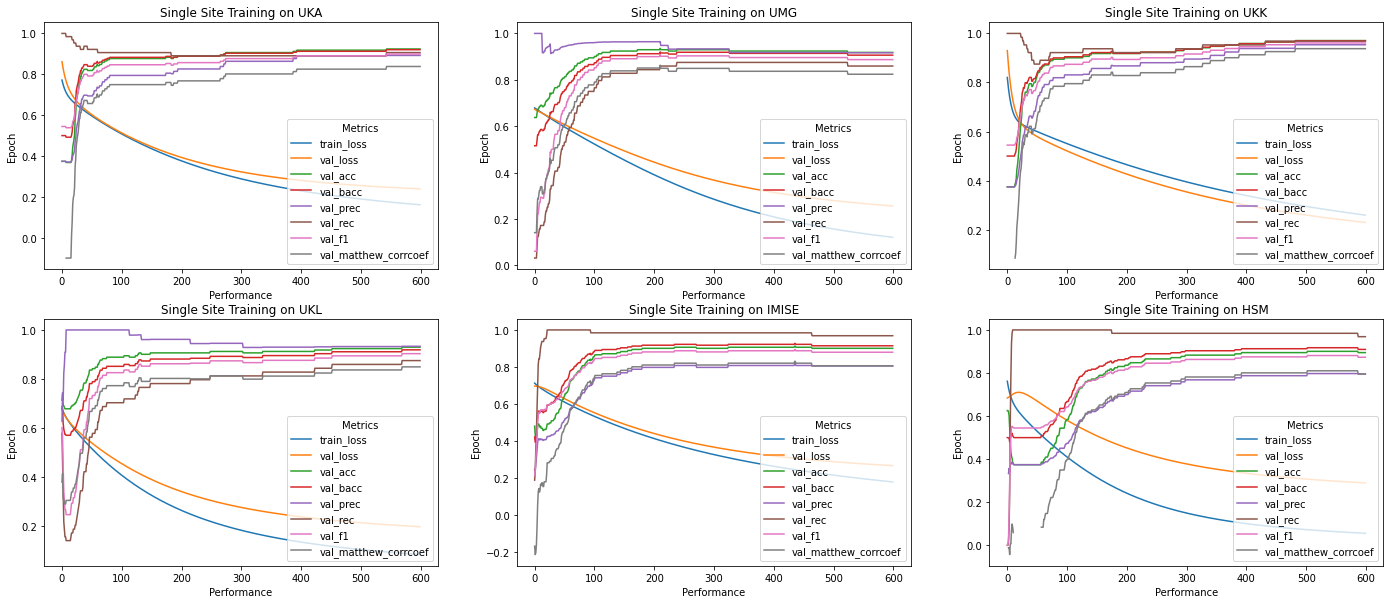

* Start Institutional Incremental Learning
* Start Institutional Incremental Learning
loss 0.2794, acc 89.47, bacc 91.27, precision 78.75, recall 98.44, f1 87.50, matthews_corrcoef 80.06, 
* Start Cyclic Institutional Incremental Learning
loss 0.2343, acc 92.98, bacc 94.08, precision 85.14, recall 98.44, f1 91.30, matthews_corrcoef 86.11, 


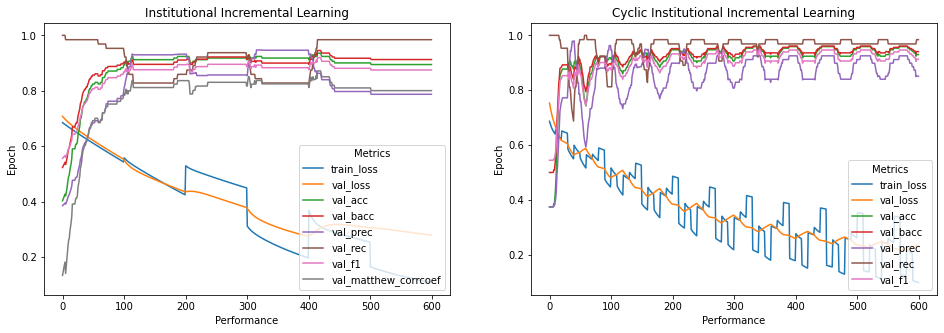

In [6]:
df_data = pd.read_csv(osp.join(BASE_DIR, "data.csv"))
df_data = df_data.drop(["Unnamed: 32"], axis=1)
df_data["diagnosis"] = df_data["diagnosis"].map({"M":1, "B":0})
final_result = []
for distribution_mode in DISTRIBUTION_MODES:
    print("##################################################################################")
    print("Data Distribution Mode: {}".format(distribution_mode))
    print("##################################################################################")
    experiment_dir = osp.join(OUTPUT_DIR, distribution_mode, "S")
    if not os.path.exists(experiment_dir):
        os.makedirs(experiment_dir)
    final_test_df = pd.read_csv(osp.join(BASE_DIR, "{}/final_test.csv".format(distribution_mode))).rename(columns={"patient_id":"id"})
    final_test_df["id"] = final_test_df["id"].map(lambda x: int(x[6:]))
    final_test_df = pd.merge(df_data, final_test_df, on='id', how='right')
    station_dfs = [pd.read_csv(osp.join(BASE_DIR,"synthetic","{}/{}/S.csv".format(distribution_mode, station))).rename(columns={"patient_id":"id"}) for station in STATION_LIST]
    for idx in range(len(STATION_LIST)):
        # station_dfs[idx]["id"] = station_dfs[idx]["id"].map(lambda x: int(x[6:]))
        station_dfs[idx]["diagnosis"] = station_dfs[idx]["diagnosis"].map({"M":1, "B":0})    

    test_scaler = StandardScaler()
    X_test = final_test_df[X_FEATURES]
    y_test = final_test_df[Y_FEATURE]
    X_test = test_scaler.fit_transform(X_test)
    y_test.replace(to_replace=dict(M=1, B=0), inplace=True)
    y_test = y_test.to_numpy()

    ##################################################################################
    ## Single site training
    ##################################################################################
    print("* Start Single Site Training")
    input_dim = 30
    hidden_dim = 64
    num_classes = 2
    learning_rate = 0.01
    weight_decay = 0.0005
    num_epochs = 600
    criterion = nn.CrossEntropyLoss()
    fig, axs = plt.subplots(2,3,figsize=(24, 10))
    for idx in range(len(STATION_LIST)):
        scaler = StandardScaler()
        df_X = station_dfs[idx][X_FEATURES]
        df_Y = station_dfs[idx][Y_FEATURE]
        df_X = scaler.fit_transform(df_X)
        df_Y = df_Y.to_numpy()
        model = LogisticRegression(input_dim, hidden_dim, num_classes)
        optim = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        losses = []
        val_losses = []
        val_tns = []
        val_fps = []
        val_fns = []
        val_tps = []
        val_accs = []
        val_balanced_accs = []
        val_precs = []
        val_recs = []
        val_f1s = []
        val_matthews_corrcoefs = []
        results = []
        for epoch in range(num_epochs):
            perm = np.arange(df_X.shape[0])
            np.random.shuffle(perm)
            X_train = df_X[perm]
            y_train = df_Y[perm]
            loss = train(X_train, y_train, model, criterion, optim)
            val_loss, val_tn, val_fp, val_fn, val_tp, val_acc, val_balanced_acc, val_precesion, val_recall, val_f1_score, val_matthews_corrcoef = valid(X_test, y_test, model, criterion)
            losses.append(loss)
            val_losses.append(val_loss)
            val_tns.append(val_tn)
            val_fps.append(val_fp)
            val_fns.append(val_fn)
            val_tps.append(val_tp)
            val_accs.append(val_acc)
            val_balanced_accs.append(val_balanced_acc)
            val_precs.append(val_precesion)
            val_recs.append(val_recall)
            val_f1s.append(val_f1_score)
            val_matthews_corrcoefs.append(val_matthews_corrcoef)
            results.append([epoch, loss, val_loss, val_tn, val_fp, val_fn, val_tp, val_acc, val_balanced_acc, val_precesion, val_recall, val_f1_score, val_matthews_corrcoef])
        axs[idx//3][idx%3].plot(losses, label="train_loss")
        axs[idx//3][idx%3].plot(val_losses, label="val_loss")
        axs[idx//3][idx%3].plot(val_accs, label="val_acc")
        axs[idx//3][idx%3].plot(val_balanced_accs, label="val_bacc")
        axs[idx//3][idx%3].plot(val_precs, label="val_prec")
        axs[idx//3][idx%3].plot(val_recs, label="val_rec")
        axs[idx//3][idx%3].plot(val_f1s, label="val_f1")
        axs[idx//3][idx%3].plot(val_matthews_corrcoefs, label="val_matthew_corrcoef")
        axs[idx//3][idx%3].legend(title="Metrics", loc="lower right")
        axs[idx//3][idx%3].title.set_text("Single Site Training on {}".format(STATION_LIST[idx].upper())),
        axs[idx//3][idx%3].set_ylabel("Epoch")
        axs[idx//3][idx%3].set_xlabel("Performance")
        final_result.append(["S", f"sst_{STATION_LIST[idx]}",distribution_mode,losses[-1],val_losses[-1],val_tns[-1],val_fps[-1],val_fns[-1],val_tps[-1],val_accs[-1],val_balanced_accs[-1],val_precs[-1],val_recs[-1],val_f1s[-1],val_matthews_corrcoefs[-1]])
        print("**On {}".format(STATION_LIST[idx].upper()))
        print("loss {:.4f}, acc {:.2f}, bacc {:.2f}, precision {:.2f}, recall {:.2f}, f1 {:.2f}, matthews_corrcoef {:.2f}, ".format(val_losses[-1], val_accs[-1]*100, val_balanced_accs[-1]*100, val_precs[-1]*100, val_recs[-1]*100, val_f1s[-1]*100, val_matthews_corrcoefs[-1]*100))
        results = pd.DataFrame(np.array(results), columns=["epoch", "loss", "val_loss", "val_tn", "val_fp", "val_fn", "val_tp", "val_acc", "val_bacc","val_prec", "val_rec", "val_f1", "val_matthews_corrcoef"])
        results.to_csv(osp.join(experiment_dir, f"sst_{STATION_LIST[idx]}_result.csv"),index=False)
    plt.show()

    fig, axs = plt.subplots(1, 2, figsize=(16, 5))
    ##################################################################################
    ## Institutional Incremental Learning
    ##################################################################################
    print("* Start Institutional Incremental Learning")
    input_dim = 30
    hidden_dim = 64
    num_classes = 2
    learning_rate = 0.01
    weight_decay = 0.0005
    num_epochs = 100
    criterion = nn.CrossEntropyLoss()
    model = LogisticRegression(input_dim, hidden_dim, num_classes)
    losses = []
    val_losses = []
    val_tns = []
    val_fps = []
    val_fns = []
    val_tps = []
    val_accs = []
    val_balanced_accs = []
    val_precs = []
    val_recs = []
    val_f1s = []
    val_matthews_corrcoefs = []
    results = []
    for idx in range(len(STATION_LIST)):
        optim = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        scaler = StandardScaler()
        df_X = station_dfs[idx][X_FEATURES]
        df_Y = station_dfs[idx][Y_FEATURE]
        df_X = scaler.fit_transform(df_X)
        df_Y = df_Y.to_numpy()
        for epoch in range(num_epochs):
            perm = np.arange(df_X.shape[0])
            np.random.shuffle(perm)
            X_train = df_X[perm]
            y_train = df_Y[perm]
            loss = train(X_train, y_train, model, criterion, optim)
            val_loss, val_tn, val_fp, val_fn, val_tp, val_acc, val_balanced_acc, val_precesion, val_recall, val_f1_score, val_matthews_corrcoef = valid(X_test, y_test, model, criterion)
            losses.append(loss)
            val_losses.append(val_loss)
            val_tns.append(val_tn)
            val_fps.append(val_fp)
            val_fns.append(val_fn)
            val_tps.append(val_tp)
            val_accs.append(val_acc)
            val_balanced_accs.append(val_balanced_acc)
            val_precs.append(val_precesion)
            val_recs.append(val_recall)
            val_f1s.append(val_f1_score)
            val_matthews_corrcoefs.append(val_matthews_corrcoef)
            results.append([epoch, loss, val_loss, val_tn, val_fp, val_fn, val_tp, val_acc, val_balanced_acc, val_precesion, val_recall, val_f1_score, val_matthews_corrcoef])
    axs[0].plot(losses, label="train_loss")
    axs[0].plot(val_losses, label="val_loss")
    axs[0].plot(val_accs, label="val_acc")
    axs[0].plot(val_balanced_accs, label="val_bacc")
    axs[0].plot(val_precs, label="val_prec")
    axs[0].plot(val_recs, label="val_rec")
    axs[0].plot(val_f1s, label="val_f1")
    axs[0].plot(val_matthews_corrcoefs, label="val_matthew_corrcoef")
    axs[0].legend(title="Metrics", loc="lower right")
    axs[0].title.set_text("Institutional Incremental Learning"),
    axs[0].set_ylabel("Epoch")
    axs[0].set_xlabel("Performance")
    final_result.append(["S","iil",distribution_mode,losses[-1],val_losses[-1],val_tns[-1],val_fps[-1],val_fns[-1],val_tps[-1],val_accs[-1],val_balanced_accs[-1],val_precs[-1],val_recs[-1],val_f1s[-1],val_matthews_corrcoefs[-1]])
    print("* Start Institutional Incremental Learning")
    print("loss {:.4f}, acc {:.2f}, bacc {:.2f}, precision {:.2f}, recall {:.2f}, f1 {:.2f}, matthews_corrcoef {:.2f}, ".format(val_losses[-1], val_accs[-1]*100, val_balanced_accs[-1]*100, val_precs[-1]*100, val_recs[-1]*100, val_f1s[-1]*100, val_matthews_corrcoefs[-1]*100))
    results = pd.DataFrame(np.array(results), columns=["epoch", "loss", "val_loss", "val_tn", "val_fp", "val_fn", "val_tp", "val_acc", "val_bacc","val_prec", "val_rec", "val_f1", "val_matthews_corrcoef"])
    results.to_csv(osp.join(experiment_dir, "iil_result.csv"),index=False) 
    
    ##################################################################################
    ## Cyclic Institutional Incremental Learning
    ##################################################################################
    input_dim = 30
    hidden_dim = 64
    num_classes = 2
    learning_rate = 0.01
    weight_decay = 0.0005
    num_cycles = 10
    num_epochs = 10
    criterion = nn.CrossEntropyLoss()
    model = LogisticRegression(input_dim, hidden_dim, num_classes)
    losses = []
    val_losses = []
    val_tns = []
    val_fps = []
    val_fns = []
    val_tps = []
    val_accs = []
    val_balanced_accs = []
    val_precs = []
    val_recs = []
    val_f1s = []
    val_matthews_corrcoefs = []
    results = []
    for cycle in range(num_cycles):
        for idx in range(len(STATION_LIST)):
            optim = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
            scaler = StandardScaler()
            df_X = station_dfs[idx][X_FEATURES]
            df_Y = station_dfs[idx][Y_FEATURE]
            df_X = scaler.fit_transform(df_X)
            df_Y = df_Y.to_numpy()
            for epoch in range(num_epochs):
                perm = np.arange(df_X.shape[0])
                np.random.shuffle(perm)
                X_train = df_X[perm]
                y_train = df_Y[perm]
                loss = train(X_train, y_train, model, criterion, optim)
                val_loss, val_tn, val_fp, val_fn, val_tp, val_acc, val_balanced_acc, val_precesion, val_recall, val_f1_score, val_matthews_corrcoef = valid(X_test, y_test, model, criterion)
                losses.append(loss)
                val_losses.append(val_loss)
                val_tns.append(val_tn)
                val_fps.append(val_fp)
                val_fns.append(val_fn)
                val_tps.append(val_tp)
                val_accs.append(val_acc)
                val_balanced_accs.append(val_balanced_acc)
                val_precs.append(val_precesion)
                val_recs.append(val_recall)
                val_f1s.append(val_f1_score)
                val_matthews_corrcoefs.append(val_matthews_corrcoef)
                results.append([epoch, loss, val_loss, val_tn, val_fp, val_fn, val_tp, val_acc, val_balanced_acc, val_precesion, val_recall, val_f1_score, val_matthews_corrcoef])
    axs[1].plot(losses, label="train_loss")
    axs[1].plot(val_losses, label="val_loss")
    axs[1].plot(val_accs, label="val_acc")
    axs[1].plot(val_balanced_accs, label="val_bacc")
    axs[1].plot(val_precs, label="val_prec")
    axs[1].plot(val_recs, label="val_rec")
    axs[1].plot(val_f1s, label="val_f1")
    axs[1].legend(title="Metrics", loc="lower right")
    axs[1].title.set_text("Cyclic Institutional Incremental Learning"),
    axs[1].set_ylabel("Epoch")
    axs[1].set_xlabel("Performance")
    final_result.append(["S","Ciil",distribution_mode,losses[-1],val_losses[-1],val_tns[-1],val_fps[-1],val_fns[-1],val_tps[-1],val_accs[-1],val_balanced_accs[-1],val_precs[-1],val_recs[-1],val_f1s[-1],val_matthews_corrcoefs[-1]])
    print("* Start Cyclic Institutional Incremental Learning")
    print("loss {:.4f}, acc {:.2f}, bacc {:.2f}, precision {:.2f}, recall {:.2f}, f1 {:.2f}, matthews_corrcoef {:.2f}, ".format(val_losses[-1], val_accs[-1]*100, val_balanced_accs[-1]*100, val_precs[-1]*100, val_recs[-1]*100, val_f1s[-1]*100, val_matthews_corrcoefs[-1]*100))
    results = pd.DataFrame(np.array(results), columns=["epoch", "loss", "val_loss", "val_tn", "val_fp", "val_fn", "val_tp", "val_acc", "val_bacc","val_prec", "val_rec", "val_f1", "val_matthews_corrcoef"])
    results.to_csv(osp.join(experiment_dir, "ciil_result.csv"),index=False)     
    plt.show()
final_result = pd.DataFrame(np.array(final_result), columns=["data_type", "approaches", "distribution", "train_loss", "val_loss", "val_tn", "val_fp", "val_fn", "val_tp", "val_acc", "val_bacc","val_prec", "val_rec", "val_f1", "val_matthews_corrcoef"])
final_result.to_csv(osp.join(OUTPUT_DIR, "result_s.csv"),index=False)     
   

In [7]:
# df_data = pd.read_csv(osp.join(BASE_DIR, "data.csv"))
# df_data = df_data.drop(["Unnamed: 32"], axis=1)
# station_df = pd.read_csv(osp.join(BASE_DIR, "{}/{}.csv".format("setting1", "uka"))).rename(columns={"patient_id":"id"})
# final_test_df = pd.read_csv(osp.join(BASE_DIR, "{}/final_test.csv".format("setting1"))).rename(columns={"patient_id":"id"})
# station_df["id"] = station_df["id"].map(lambda x: int(x[6:]))
# station_df = pd.merge(df_data, station_df, on='id', how='right')
# final_test_df["id"] = final_test_df["id"].map(lambda x: int(x[6:]))
# final_test_df = pd.merge(df_data, final_test_df, on='id', how='right')
# input_dim = 30
# hidden_dim = 64
# num_classes = 2
# learning_rate = 0.01
# weight_decay = 0.0005
# num_epochs = 1
# criterion = nn.CrossEntropyLoss()
# scaler = StandardScaler()
# df_X = station_df[X_FEATURES]
# df_Y = station_df[Y_FEATURE]
# df_X = scaler.fit_transform(df_X)
# df_Y.replace(to_replace=dict(M=1, B=0), inplace=True)
# df_Y = df_Y.to_numpy()
# test_scaler = StandardScaler()
# X_test = final_test_df[X_FEATURES]
# y_test = final_test_df[Y_FEATURE]
# X_test = test_scaler.fit_transform(X_test)
# y_test.replace(to_replace=dict(M=1, B=0), inplace=True)
# y_test = y_test.to_numpy()
# model = LogisticRegression(input_dim, hidden_dim, num_classes)
# optim = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
# for epoch in range(num_epochs):
#     perm = np.arange(df_X.shape[0])
#     np.random.shuffle(perm)
#     X_train = df_X[perm]
#     y_train = df_Y[perm]
#     loss = train(X_train, y_train, model, criterion, optim)
#     valid(X_test, y_test, model, criterion)